In [1]:
from google.colab import files
files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


{'Position_Salaries.csv': b'Position,Level,Salary\r\nBusiness Analyst,1,45000\r\nJunior Consultant,2,50000\r\nSenior Consultant,3,60000\r\nManager,4,80000\r\nCountry Manager,5,110000\r\nRegion Manager,6,150000\r\nPartner,7,200000\r\nSenior Partner,8,300000\r\nC-level,9,500000\r\nCEO,10,1000000'}

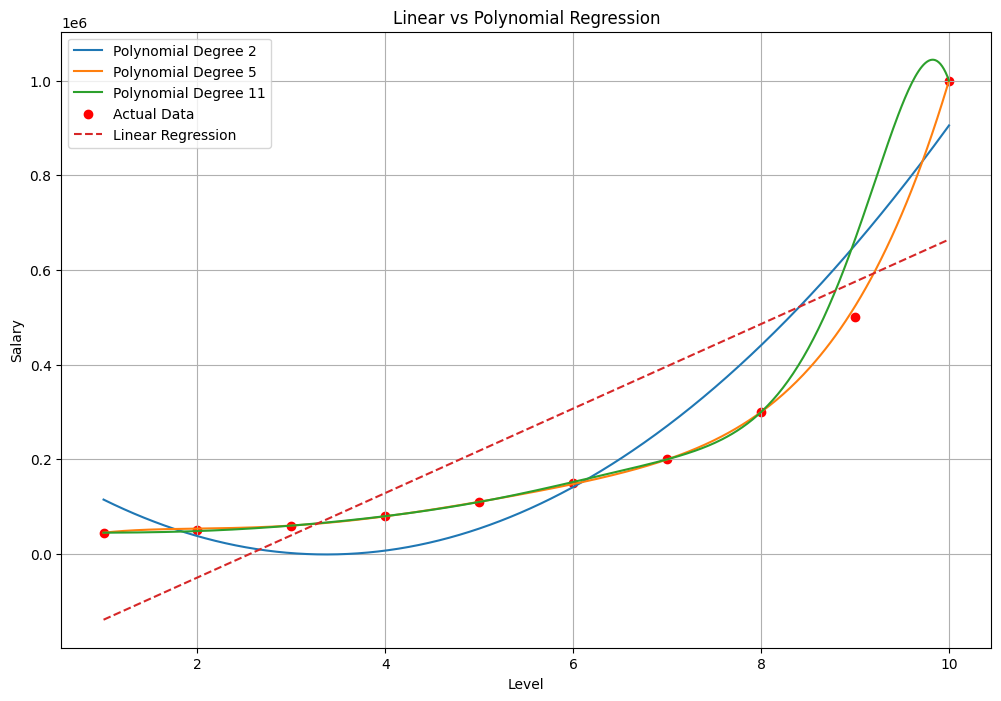


Evaluating models for underfitting and overfitting:
Degree 1: Train Error = 33451423267.33, Test Error = 13447704524.47
  - Possible underfitting detected (training error high).
Degree 2: Train Error = 7223030324.87, Test Error = 7829305425.08
Degree 5: Train Error = 43591.33, Test Error = 189541126.63
  - Possible overfitting detected (test error significantly higher).
Degree 11: Train Error = 0.00, Test Error = 9060966822.27
  - Possible overfitting detected (test error significantly higher).
Linear Regression Bias: 80839225604.41, Variance: 65708600604.41
Polynomial Degree 2 Bias: 80836519789.37, Variance: 86075073645.33
Polynomial Degree 5 Bias: 80668499569.43, Variance: 81784826281.32
Polynomial Degree 11 Bias: 80936147430.55, Variance: 91383266167.39


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load dataset
# Replace 'Position_Salaries.csv' with the correct path to your dataset
data = pd.read_csv('Position_Salaries.csv')
X = data[['Level']].values  # Independent variable
y = data['Salary'].values   # Dependent variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Function to fit and visualize polynomial regression
polynomial_degrees = [2, 5, 11]
models = {}
plt.figure(figsize=(12, 8))

for degree in polynomial_degrees:
    # Transform the features for polynomial regression
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Fit the polynomial regression model
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, y_train)
    models[degree] = poly_regressor

    # Plot predictions
    X_grid = np.linspace(min(X), max(X), 500).reshape(-1, 1)  # Smooth curve
    X_grid_poly = poly_features.transform(X_grid)
    y_pred = poly_regressor.predict(X_grid_poly)

    plt.plot(X_grid, y_pred, label=f'Polynomial Degree {degree}')

# Plot Linear Regression predictions
plt.scatter(X, y, color='red', label='Actual Data')
y_pred_linear = linear_regressor.predict(X)
plt.plot(X, y_pred_linear, label='Linear Regression', linestyle='--')

# Final plot adjustments
plt.title('Linear vs Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

# Evaluate models for underfitting and overfitting
print("\nEvaluating models for underfitting and overfitting:")
for degree in [1] + polynomial_degrees:  # Include Linear Regression as degree 1
    if degree == 1:
        model = linear_regressor
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    else:
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        model = models[degree]
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    print(f"Degree {degree}: Train Error = {train_error:.2f}, Test Error = {test_error:.2f}")

    if train_error > test_error:
        print("  - Possible underfitting detected (training error high).")
    elif test_error > train_error * 1.5:  # Example threshold for overfitting
        print("  - Possible overfitting detected (test error significantly higher).")



# Bias and Variance calculation
def calculate_bias_variance(model, X, y, degree=None):
    if degree is not None:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)
        y_pred = model.predict(X_poly)
    else:
        y_pred = model.predict(X)

    bias = np.mean((y - np.mean(y_pred)) ** 2)
    variance = np.mean((y_pred - np.mean(y_pred)) ** 2)
    return bias, variance

# Bias and Variance for Linear Regression
bias_linear, variance_linear = calculate_bias_variance(linear_regressor, X, y)
print(f"Linear Regression Bias: {bias_linear:.2f}, Variance: {variance_linear:.2f}")

# Bias and Variance for Polynomial Regression models
for degree in polynomial_degrees:
    bias, variance = calculate_bias_variance(models[degree], X, y, degree=degree)
    print(f"Polynomial Degree {degree} Bias: {bias:.2f}, Variance: {variance:.2f}")
